### Introduction to Math for DS Personal Assignnment


#### 1.1 Modelling Bird Population Decline Due to Invasive Snakes

In [ ]:
import sympy

# Define symbolic variable
t = sympy.symbols('t')

# Define constants
# Define the maximum capacity A, the value of k, and the invasion time
A = 1000  # Maximum capacity, representing the initial bird population before snake invasion
k = 0.1  # You may need to adjust this value based on your data or observations

# Define the function
P = A * sympy.exp(-k * t**2)

# Calculate the derivative with resympyect to t
P_derivative = sympy.diff(P, t)

# Print the elegant mathematical expression
P_derivative

In [ ]:
import numpy
import matplotlib.pyplot as plt

# Convert the SymPy expression to a computable NumPy function
P_derivative_func = sympy.lambdify(t, P_derivative, 'numpy')

# Generate a time range
t_values = numpy.linspace(0, 10, 100)

# Calculate the values of the derivative function over the time range
derivative_values = P_derivative_func(t_values)

# Plot the derivative function
plt.plot(t_values, derivative_values)
plt.xlabel("Time (t)")
plt.ylabel("Derivative of P(t)")
plt.title("Derivative of P(t) Over Time")
plt.grid(True)
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
import numpy as np

def bird_population_model(t, A, k, invade_time):
    P = np.zeros_like(t)  # Initialize the population array

    for i in range(len(t)):
        if t[i] < invade_time:
            P[i] = A  # Bird population remains constant before invasion
        else:
            P[i] = A * np.exp(-k * (t[i] - invade_time)**2)

    return P


invade_time = 5  # Time of snake invasion

# Generate a time range for plotting
t = np.linspace(0, 15, 100)  # Adjust the time range as needed

# Calculate the population over time
P = bird_population_model(t, A, k, invade_time)

# Plot the population over time
plt.plot(t, P)
plt.xlabel("Time")
plt.ylabel("Bird Population")
plt.title("Bird Population Over Time")
plt.grid(True)
plt.show()

#### 1.2 Seasonal Epidemiological Models

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def pandemic_model(t):
#     # Define the peak year and the duration of the pandemic
#     peak_year = 5
#     duration = 10

#     # Calculate the number of cases based on the given conditions
#     cases = np.zeros_like(t)
#     for i in range(len(t)):
#         year = int(t[i])
#         if 0 <= year < peak_year:
#             cases[i] = (year + t[i] - year) / peak_year * (duration / 2)
#         elif peak_year <= year < peak_year + duration / 2:
#             cases[i] = (1 - (year + t[i] - year - peak_year) / (duration / 2)) * (duration / 2)

#     return cases

# # Generate a time range for plotting (a decade)
# t = np.linspace(0, 10, 100)

# # Calculate the number of cases over the decade
# cases = pandemic_model(t)

# # Create custom labels for x-axis to represent summer and winter
# x_labels = ["Years"]

# # Plot the number of cases over time
# plt.plot(x_labels, cases)
# plt.xlabel("Time (Year and Season)")
# plt.ylabel("Number of Cases")
# plt.title("Pandemic Cases Over a Decade with Seasonal Variation")
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def pandemic_model(t, a=10000, b=5, c=2, d=0.5, e=2*np.pi, f=-np.pi/2, g=0.5):
    # Gaussian (bell-shaped) curve to model the rise and fall of cases over time
    bell_curve = a * np.exp(- ((t-b) ** 2) / (2*c**2))
    # Sinusoidal curve to model the seasonal variation in cases
    sinusoid = d * np.sin(e * t + f) + g
    # The final model is a product of the bell curve and the sinusoidal curve
    return bell_curve * sinusoid


# Generate an array of time values from 0 to 10, with 400 data points
t_values_pandemic = np.linspace(0, 10, 400)
# for a time frame of 10 years
# Compute the number of cases for each time value using the model pandemic_model(t)
f_values = pandemic_model(t_values_pandemic)
# Plotting the results
plt.figure(figsize=(10, 5))
# Set the figure size
plt.plot(t_values_pandemic, f_values,
         label="Number of Cases")
plt.xlabel("Time (Years)")
# X-axis label
plt.ylabel("Number of Cases")
# Y-axis label
plt.title("Pandemic Cases Over a Decade with Seasonal Variation")
plt.legend()
# Display the legend on the plot
plt.grid(True)
# Add a grid to the plot for better readability
plt.show()

#### 4.1 Gradient Descent from (2, 4) for pandemic_model(x, y)

In [ ]:
import sympy as sp
x, y = sp.symbols('x y')
F = x**2 + y**2 - 6*sp.sin(x - y)

partial_x = sp.diff(F, x)
partial_y = sp.diff(F, y)


print("Partial derivative with respect to x:", partial_x)
print("Partial derivative with respect to y:", partial_y)

In [ ]:
partial_x

In [ ]:
partial_y

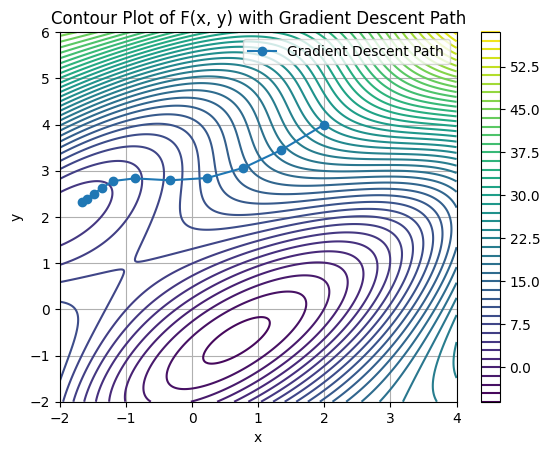

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the function pandemic_model(x, y)
F = x**2 + y**2 - 6*sp.sin(x - y)

# Initialize the starting point
x_current, y_current = 2, 4

# Choose the step size parameter
alpha = 0.1  # Change different values 0.1, 0.5, 1

# Create lists to store the trajectory
x_trajectory = [x_current]
y_trajectory = [y_current]

# Iterate for gradient descent
for step in range(10):
    # Calculate the gradient
    gradient_x = sp.diff(F, x).subs({x: x_current, y: y_current})
    gradient_y = sp.diff(F, y).subs({x: x_current, y: y_current})

    # Update the point
    x_current -= alpha * gradient_x
    y_current -= alpha * gradient_y

    # Add to the trajectory lists
    x_trajectory.append(x_current)
    y_trajectory.append(y_current)

# Create a contour plot
x_vals = np.linspace(-2, 4, 400)
y_vals = np.linspace(-2, 6, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y**2 - 6*np.sin(X - Y)
plt.contour(X, Y, Z, levels=50)
plt.colorbar()

plt.plot(x_trajectory, y_trajectory, marker='o', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of F(x, y) with Gradient Descent Path')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np

# Define the vectors u and v
u = np.array([5, 6])
v = np.array([1, -2])

# Calculate the length of vector u
length_u = np.linalg.norm(u)

# Calculate the length of vector v
length_v = np.linalg.norm(v)

# Calculate the dot product of u and v
dot_product_uv = np.dot(u, v)

# Calculate the angle between u and v (in radians)
cosine_theta = dot_product_uv / (length_u * length_v)
theta = np.arccos(cosine_theta)

# Convert the angle from radians to degrees
theta_degrees = np.degrees(theta)

# Print the results
print("Length of u:", length_u)
print("Length of v:", length_v)
print("Angle between u and v (in radians):", theta)
print("Angle between u and v (in degrees):", theta_degrees)


Length of u: 7.810249675906654
Length of v: 2.23606797749979
Angle between u and v (in radians): 1.983206768392284
Angle between u and v (in degrees): 113.62937773065683


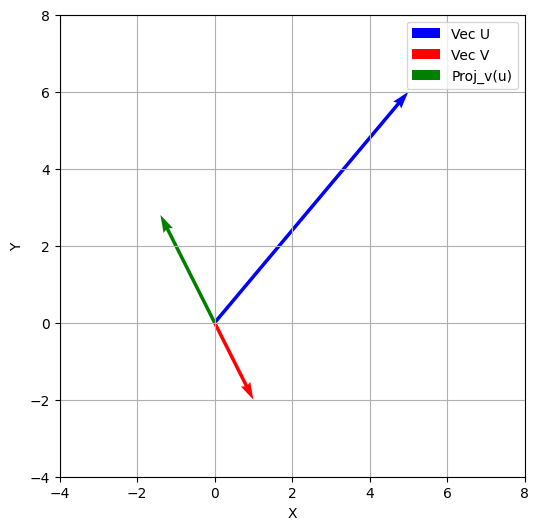

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define vectors ~u and ~v
u = np.array([5, 6])
v = np.array([1, -2])

# Calculate Proj_v(u)
proj_v_u = (np.dot(u, v) / np.dot(v, v)) * v

# Create a plot to visualize the vectors
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vec U')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vec V')
plt.quiver(0, 0, proj_v_u[0], proj_v_u[1], angles='xy', scale_units='xy', scale=1, color='g', label='Proj_v(u)')

# Set plot limits
plt.xlim(-4, 8)
plt.ylim(-4, 8)

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
